# Dataset


The Garbage Classification Dataset contains 6 classifications: cardboard (393), glass (491), metal (400), paper(584), plastic (472) and trash(127).

This dataset was obtained from a kaggle competition and some classes removed for this project 

The classes availlable for trainning and validation  in this project are  four classes

The dataset can be obtained from this link https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification


There are  four classes of waste material we are trying to classify 
1. Metal
2. Plastic
3. Paper
4. Glass

# Baseline Modeling


### Overview of Fast.ai
Fast.ai is a popular Deep Learning framework built on top of PyTorch. It aims at building state-of-the-art models quickly and easily in a few lines of code.  It greatly simplifies the training process of a deep learning model without compromising on the speed, flexibility, and performance of the training model. Fast.ai supports state-of-the-art techniques and models in Computer Vision and NLP too.

### Why should decided to  use Fast.ai?
Along with the high productivity and ease of using Fast.ai’s models, it also assures us the flexibility that enables us to customize the high-level API without meddling in the lower level. Fast.ai is also packed with some really cool features making it one of the beginner’s favorite libraries to get started in deep learning.

### Image Databunches
Image Data-bunches help to bring together our training, validation, and test data and process the data by performing all the required transformations and normalizing the image data.

### LR Find
Learning rates can influence our model on how quickly the model learns and adapts itself to the problem. A low learning rate slows the convergence of the training process and a high learning rate can cause unpleasant divergence in the performance. Therefore, good learning rates are vital for the satisfactory performance of a model, and finding optimal learning rates is like looking for a needle in the haystack. Fast.ai’s “lr_find()” is our Knight in shining armor which saves us from the distress of finding good learning rates. 

## Trainning the Base Line Model

### Installing Dependencies and setting up the environment for trainning

In [ ]:
!pip install -Uqq fastai
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fastdownload import download_url
from fastai.vision.all import*
from fastcore.all import *

In [ ]:
path = '/content/drive/MyDrive/waste_management'

### Baseline Model  Resnet 18

Description
ResNet-18 is a convolutional neural network that is 18 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.

In [ ]:
## Creating a DataBlock  from the provided Dataset 

##  what is a datablock ?

### from the datablock we are creating a dataloader

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    ## splitter splits the data into trainning and validation percentages
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    # this function assigns the images the labels of the directory they are in
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)



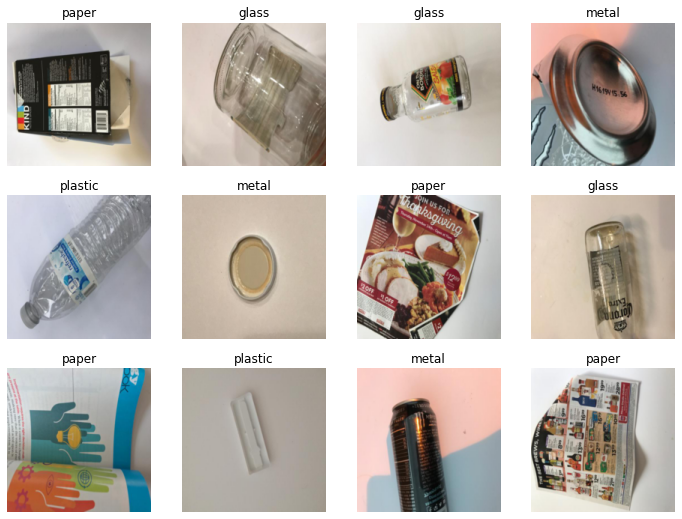

In [ ]:
## Loking into the dataloader to see a few examples
dls.show_batch(max_n=12)

In [ ]:
## Creating Machine vision Learner 
learn = vision_learner(dls, resnet18, metrics=[error_rate,accuracy],pretrained=False)
learn.fine_tune(6)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.213770,2.585524,0.732530,0.267470,00:17


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.427860,1.100460,0.409639,0.590361,00:25
1,1.210948,0.994995,0.383133,0.616867,00:16
2,0.830856,1.026030,0.327711,0.672289,00:15
3,0.550581,1.143086,0.310843,0.689157,00:14
4,0.335716,0.885473,0.262651,0.737349,00:14
5,0.195938,0.865892,0.272289,0.727711,00:16


### Testing the Baseline Model on sample Images

In [ ]:
is_,_,probs = learn.predict(PILImage.create(f'{path}/glass/glass79.jpg'))
print(f"This is a: {is_}.")
print(f"Probability it's glass: {probs[1]:.4f}")

This is a: glass.
Probability it's glass: 0.0002


(-0.5, 511.5, 383.5, -0.5)

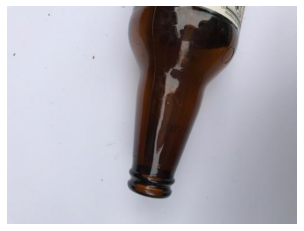

In [ ]:
from PIL import Image as PImage
from matplotlib import pyplot as plt
img = PImage.open(f'{path}/glass/glass79.jpg')
plt.imshow(img)
plt.axis('off')

In [ ]:
is_,_,probs = learn.predict(PILImage.create(f'{path}/metal/metal7.jpg'))
print(f"This is a: {is_}.")
print(f"Probability it's glass: {probs[2]:.4f}")

This is a: metal.
Probability it's glass: 0.0046


(-0.5, 511.5, 383.5, -0.5)

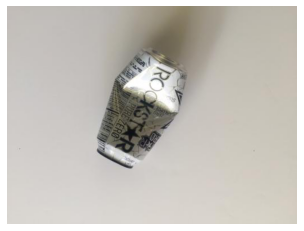

In [ ]:
from PIL import Image as PImage
from matplotlib import pyplot as plt
img = PImage.open(f'{path}/metal/metal7.jpg')
plt.imshow(img)
plt.axis('off')

### Checking the the learner results to see where it was most confused

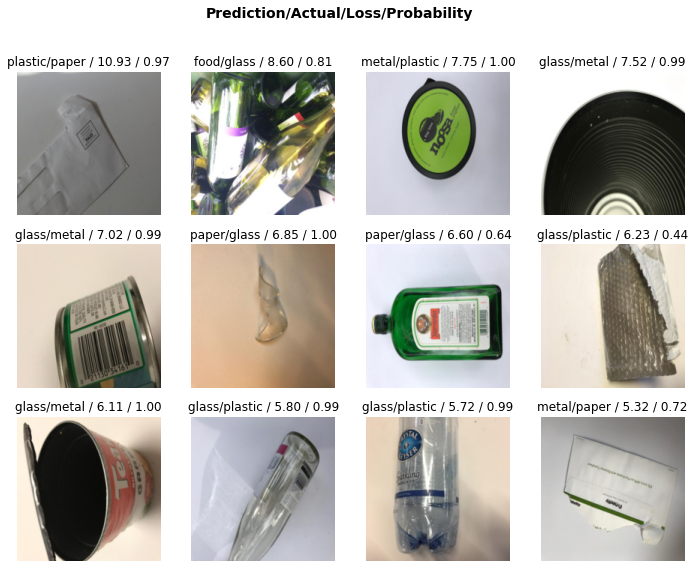

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(12)

In [ ]:
### Saving the model for later use
learn.export("waste_detector.pkl")

This dataset is simple that our Resnet 18 baseline model is getting an accuracy of 92 %

# Improving Results

In the above sections we saw the baseline model achieving an accuracy of 92% lets see if we can improve that further 

ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224

### Resnet 50

In [ ]:
## Creating Machine vision Learner 
res_learn = vision_learner(dls, resnet50, metrics=[error_rate,accuracy])
res_learn.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.148644,0.620706,0.130120,0.869880,00:16


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.399925,0.476175,0.149398,0.850602,00:18
1,0.256281,0.392594,0.101205,0.898795,00:18
2,0.236865,0.328009,0.084337,0.915663,00:18
3,0.129462,0.259673,0.091566,0.908434,00:19
4,0.065048,0.253428,0.084337,0.915663,00:18


### Checking the the learner results to see where it was most confused

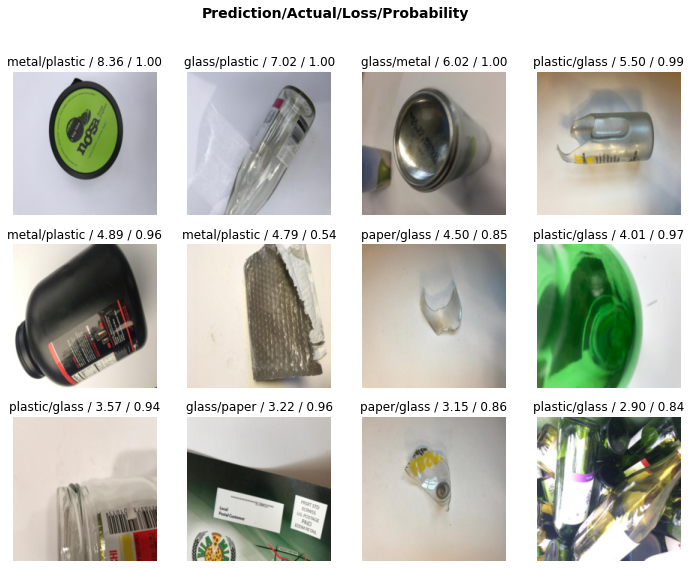

In [ ]:
interp = ClassificationInterpretation.from_learner(res_learn)
interp.plot_top_losses(12)

In [ ]:
### Saving the model for later use
res_learn.export("waste_detector_50.pkl")

Trainning with resnet 50 increased the accuracy from 92%  to 96 % . This data is a simple dataset and our accuracies are high already . with a complex dataset  we would have seen resnet 50  outperform rensnet 18  by alot

### Densnet201

In [ ]:
dens_learner = vision_learner(dls, densenet201, metrics=[error_rate,accuracy],pretrained=False)
dens_learner.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.911242,1.111848,0.368675,0.631325,00:21


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.230274,1.215170,0.363855,0.636145,00:26
1,1.104620,0.943889,0.286747,0.713253,00:26
2,0.878290,0.748128,0.231325,0.768675,00:26
3,0.659863,0.634374,0.192771,0.807229,00:26


#### learning rate of 1

In [ ]:
dens_learner = vision_learner(dls, densenet201, metrics=[error_rate,accuracy],pretrained=False)
dens_learner.fine_tune(4,1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,69.532166,8750.325195,0.956627,0.043373,00:23


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,59.614887,19170.263672,0.800000,0.200000,00:26
1,45.362526,53044.890625,0.708434,0.291566,00:26
2,30.247934,590028.625000,0.674699,0.325301,00:26
3,15.202162,883897.187500,0.496386,0.503614,00:26


With a learning rate of 1  we are only 47% accurate 

#### learning rate 0.5

In [ ]:
dens_learner = vision_learner(dls, densenet201, metrics=[error_rate,accuracy],pretrained=False)
dens_learner.fine_tune(4 ,0.5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,14.997940,381.754700,0.783133,0.216867,00:21


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,10.688765,1793.495483,0.804819,0.195181,00:28
1,8.806852,38.799686,0.640964,0.359036,00:26
2,5.545660,92.730560,0.469880,0.530120,00:26
3,3.134335,10994.029297,0.404819,0.595181,00:26


#### Optimal learning rate

SuggestedLRs(valley=0.005248074419796467, slide=0.009120108559727669)

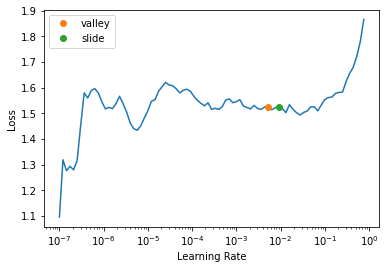

In [ ]:
dens_learner.lr_find(suggest_funcs=(valley, slide))

In [ ]:
dens_learner = vision_learner(dls, densenet201, metrics=[error_rate,accuracy])
dens_learner.fine_tune(4 ,1e-2)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.901666,0.474629,0.154217,0.845783,00:22


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.407632,0.590685,0.144578,0.855422,00:27
1,0.416090,0.366715,0.115663,0.884337,00:26
2,0.259149,0.288729,0.081928,0.918072,00:26
3,0.128310,0.247841,0.079518,0.920482,00:26


From the above with detectron we see that tunning the learning rate massively increases the accuracy from around 60%  to 90% for this dataset

### Convnext

In [ ]:
arch = 'convnext_small_in22k'

In [ ]:
def train(arch, item, batch, epochs=5,lr=1):
    dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    ## splitter splits the data into trainning and validation percentages
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    # this function assigns the images the labels of the directory they are in
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)
    learn = vision_learner(dls, arch, metrics=error_rate).to_fp16()
    learn.fine_tune(epochs, lr)
    return learn

 learning rate of 1

In [ ]:
import timm
convnext_learn = train(arch, item=Resize(192, method='squish'),
              batch=aug_transforms(size=128, min_scale=0.75))

epoch,train_loss,valid_loss,error_rate,time
0,61.165684,nan,1.000000,00:16


epoch,train_loss,valid_loss,error_rate,time
0,75.286087,nan,1.000000,00:18
1,nan,nan,1.000000,00:20
2,nan,nan,1.000000,00:18
3,nan,nan,1.000000,00:18
4,nan,nan,1.000000,00:18


The convnext learner doesnt learn anything about the data at  a learning rate of one

learning rate  0.5

In [ ]:
convnext_learn = train(arch,lr=0.5 ,item=Resize(192, method='squish'),
              batch=aug_transforms(size=128, min_scale=0.75))

epoch,train_loss,valid_loss,error_rate,time
0,20.231529,356.666779,0.640964,00:19


epoch,train_loss,valid_loss,error_rate,time
0,19.478020,470.264008,0.585542,00:18
1,14.456144,15778.478516,0.918072,00:18
2,9.766162,30.835291,0.450602,00:20
3,4.918514,2.977452,0.257831,00:20
4,2.356966,34.788681,0.146988,00:18


At the learning rate of 0.5  the convnext model is around 96% accurate

optimal learning rate

In [ ]:
convnext_learn = train(arch,lr=1e-2 ,item=Resize(192, method='squish'),
              batch=aug_transforms(size=128, min_scale=0.75))

epoch,train_loss,valid_loss,error_rate,time
0,0.748783,0.254832,0.065060,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.187488,0.296147,0.062651,00:19
1,0.190503,0.287131,0.060241,00:19
2,0.159014,0.209780,0.043373,00:20
3,0.083259,0.166277,0.031325,00:19
4,0.039213,0.158354,0.026506,00:19


Given the optimal learning rate the convnext model is 98% accurate for this Dataset . This is the best model and therefore we will Take it to production

In [ ]:
### Saving the model for later use
convnext_learn.export("waste_detector_c.pkl")

# Deployment

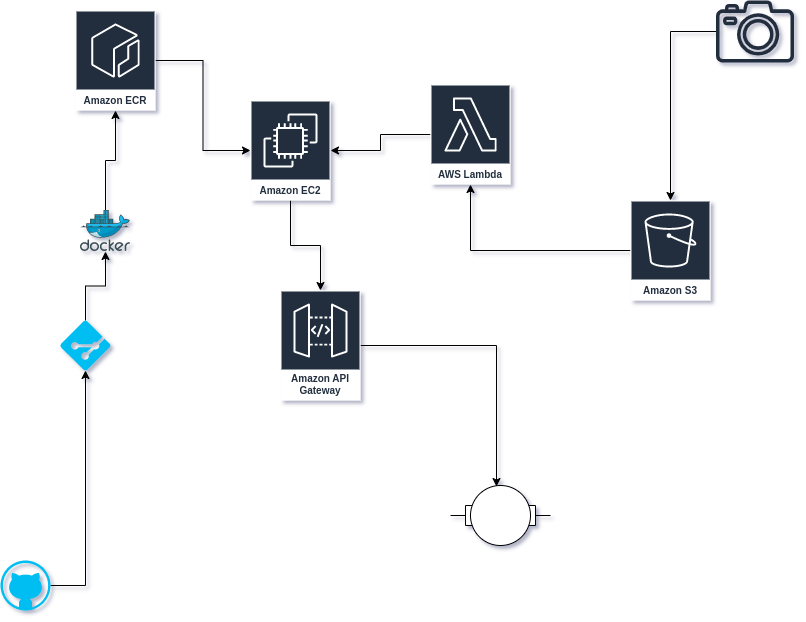

In [ ]:
from IPython.display import Image
Image(f'{path}/dep/final_year.png')